# Forcasting CocaCola

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading Dataset
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [5]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [7]:
data.shape

(42, 2)

In [9]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [10]:
data['Quarters'] = 0
data['Year'] = 0
for i in range(42):
    p = data["Quarter"][i]
    data['Quarters'][i]= p[0:2]
    data['Year'][i]= p[3:5]

C:\Users\parsh\AppData\Local\Temp/ipykernel_10204/623072998.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quarters'][i]= p[0:2]
C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\parsh\AppData\Local\Temp/ipykernel_10204/623072998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[

In [11]:
data.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [12]:
Quarters_Dummies = pd.DataFrame(pd.get_dummies(data['Quarters']))
data = pd.concat([data,Quarters_Dummies],axis = 1)
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


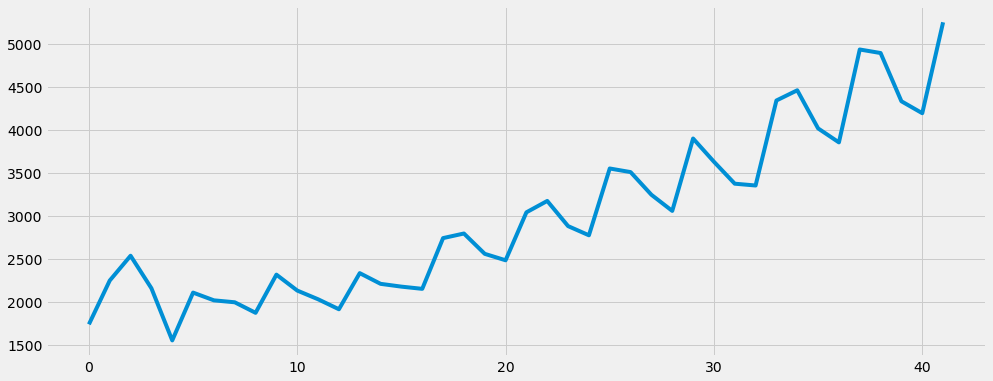

In [15]:
plt.style.use('fivethirtyeight')
data['Sales'].plot(figsize=(15, 6))
plt.show()

<AxesSubplot:>

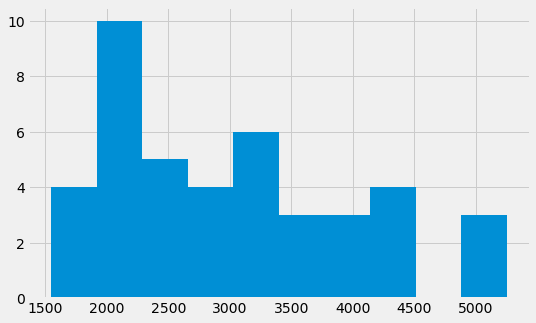

In [16]:
# Histogram
data['Sales'].hist(figsize=(8,5))

<AxesSubplot:ylabel='Density'>

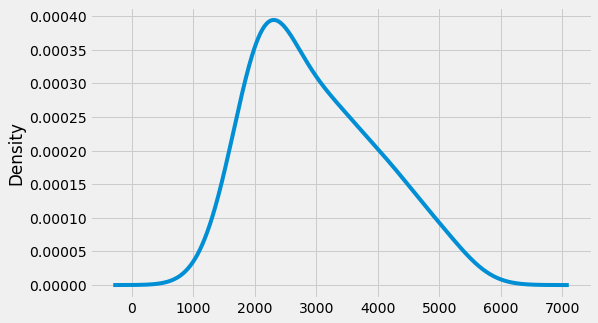

In [17]:

data['Sales'].plot(kind = 'kde', figsize=(8,5))

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

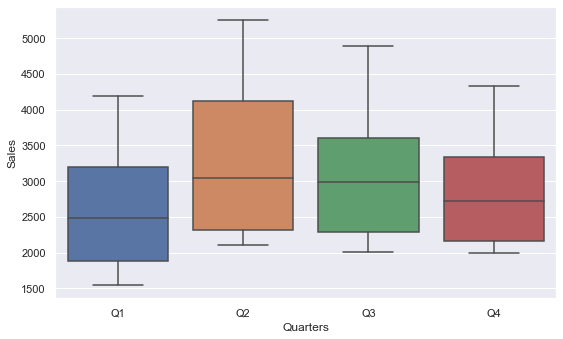

In [18]:
#boxplot of Quarters Vs. Sales
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="Quarters",y="Sales",data=data)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

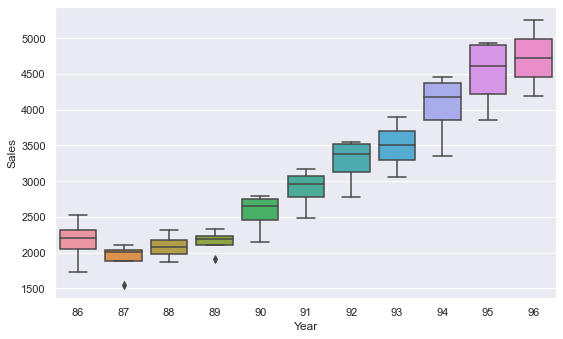

In [19]:

sns.boxplot(x="Year",y="Sales",data=data)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

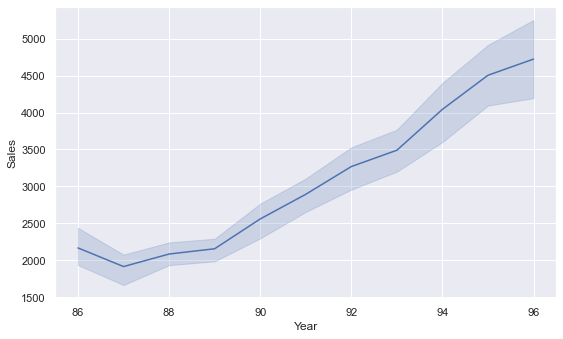

In [20]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=data)

<AxesSubplot:xlabel='Quarters', ylabel='Year'>

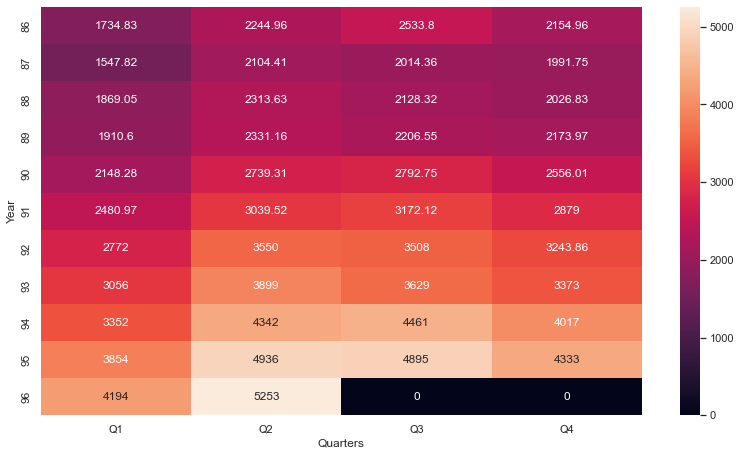

In [21]:
plt.figure(figsize=(12, 7))
heatmap_y_month = pd.pivot_table(data=data,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

# Data Driven Forecasting Methods

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 


In [23]:
# Splitting Data

In [24]:
Train = data.head(32)
Test = data.tail(10)

### Moving Average Method

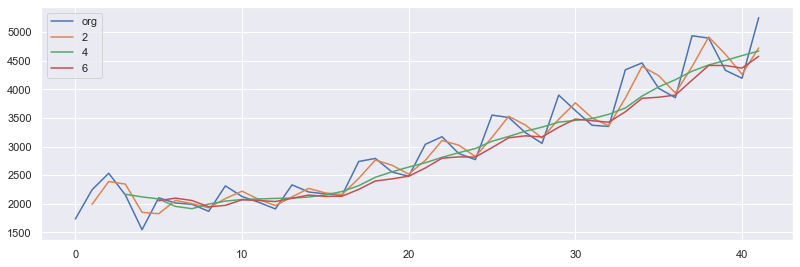

In [25]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,8,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time series decomposition plot

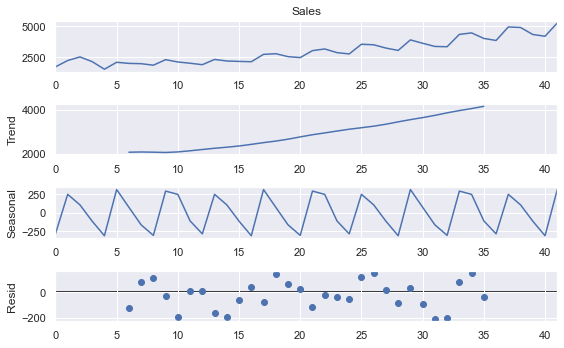

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

# Model based Forecasting Methods

In [29]:
data["t"] = np.arange(1,43)
data["t_squared"] = data["t"]*data["t"]

data["log_sales"] = np.log(data["Sales"])

data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [31]:
# splitting data in parts
Train = data.head(32)
Test = data.tail(10)

## Linear Model

In [33]:
import statsmodels.formula.api as smf 

# RMSE MEtric
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

752.9233932767115

## Exponential Model

In [36]:
#Exponential

Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

590.3316432076576

## Quadratic Model

In [38]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_Quad_model

457.73573554072897

# Additive Seasonality model

In [39]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3']]))
rmse_add_sea = RMSE(Test['Sales'], pred_add_sea)
rmse_add_sea

1850.4665461858353

## Additive Seasonality Quadratic model

In [40]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_Quad_model = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_Quad_model    

277.3510771128774

## Multiplicative Seasonality model

In [41]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea = RMSE(Test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1908.250394836116

## Multiplicative Additive Seasonality model

In [42]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mul_Add_sea = RMSE(Test['Sales'], np.exp(pred_Mult_add_sea))
rmse_Mul_Add_sea

448.867818269187

In [47]:
list = [ 
        
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model],
          ['add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_Quad_model],
          ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_Add_sea]]

In [48]:
df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Linear Mode,752.923393
1,Exp model,590.331643
2,Quad model,457.735736
3,add seasonality,1850.466546
4,Quad add seasonality,277.351077
5,Mult Seasonality,1908.250395
6,Mult add seasonality,448.867818


## Building final model with least RMSE value

In [50]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=data).fit()
pred_final = pd.Series(final_model.predict(data[['Q1','Q2','Q3','t','t_squared']]))
rmse_final_model = RMSE(data['Sales'], pred_final)
rmse_final_model

159.0552257652247

In [52]:
pred_df = pd.DataFrame({'Actual' : data.Sales, 'Predicted' : pred_final})
pred_df.head()

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143


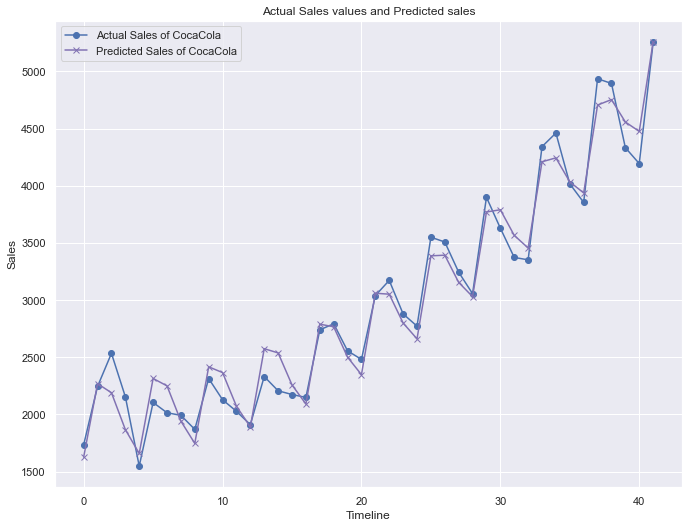

In [54]:
plt.plot(data.Sales, color='b',marker='o', label='Actual Sales of CocaCola')
plt.plot(pred_final, color='m',marker='x', label='Predicted Sales of CocaCola')

# Added titles and adjust dimensions
plt.title('Actual Sales values and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize'] = (10,8) 

plt.show()

## #Build the model on entire data set

In [58]:
model_full = smf.ols('Sales~Quarter+Quarters+Year+Q1+Q2+Q3+Q4+t+t_squared+log_sales',data=data).fit()

C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\statsmodels\regression\linear_model.py:1751: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\statsmodels\regression\linear_model.py:1751: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\statsmodels\regression\linear_model.py:1673: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 21 Feb 2022   Prob (F-statistic):                nan
Time:                        23:57:55   Log-Likelihood:                 938.09
No. Observations:                  42   AIC:                            -1792.
Df Residuals:                       0   BIC:                            -1719.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6759        inf          0        nan         nan         nan
Quarter[T.Q1_87]  -142.5462        inf         -0        nan         nan         nan
Quarter[T.Q1_88]    61.8259        inf          0        nan         nan         nan
Quarter[T.Q1_89]   -11.4955        inf         -0        nan         nan         nan
Quarter[T.Q1_90]    22.1569        inf          0        nan         nan         nan
Quarter[T.Q1_91]    85.5316        inf          0        nan         nan         nan
Quarter[T.Q1_92]    62.7497        inf          0        nan         nan         nan
Quarter[T.Q1_93]   -18.3963        inf         -0        nan         nan         nan
Quarter[T.Q1_94]  -141.7662        inf         -0        nan         nan         nan
Quarter[T.Q1_95]  -131.5239        inf         -0        nan         nan         nan
Quarter[T.Q1_96]  -320.1311        inf         -0        nan         nan         nan
Quarter[T.Q2_86]   -76.4535        inf         -0        nan         nan         nan
Quarter[T.Q2_87]  -203.7345        inf         -0        nan         nan         nan
Quarter[T.Q2_88]   -92.7275        inf         -0        nan         nan         nan
Quarter[T.Q2_89]  -199.0433        inf         -0        nan         nan         nan
Quarter[T.Q2_90]   -24.2647        inf         -0        nan         nan         nan
Quarter[T.Q2_91]     6.5475        inf          0        nan         nan         nan
Quarter[T.Q2_92]   173.7905        inf          0        nan         nan         nan
Quarter[T.Q2_93]   144.9563        inf          0        nan         nan         nan
Quarter[T.Q2_94]   149.3101        inf          0        nan         nan         nan
Quarter[T.Q2_95]   241.4983        inf          0        nan         nan         nan
Quarter[T.Q2_96]    23.6530        inf          0        nan         nan         nan
Quarter[T.Q3_86]   245.5948        inf          0        nan         nan         nan
Quarter[T.Q3_87]  -217.2356        inf         -0        nan         nan         nan
Quarter[T.Q3_88]  -201.6556        inf         -0        nan         nan         nan
Quarter[T.Q3_89]  -271.2081        inf         -0        nan         nan         nan
Quarter[T.Q3_90]    41.7886        inf          0        nan         nan         nan
Quarter[T.Q3_91]   129.6140        inf          0        nan         nan         nan
Quarter[T.Q3_92]   127.2672        inf          0        nan         nan         nan
Quarter[T.Q3_93]  -122.7327        inf         -0        nan         nan         nan
Quarter[T.Q3_94]   222.2379        inf          0        nan         nan         nan
Quarter[T.Q3_95]   152.7400        inf          0        nan         nan         nan
Quarter[T.Q4_86]   203.2653        inf          0        nan         nan         nan
Quarter[T.Q4_87]    30.

In [62]:
data1=data.drop("Sales",axis=1)

In [63]:
pred_new = pd.Series(model_full.predict(data1))

In [64]:
pred_new

0     1734.827000
1     2244.960999
2     2533.804993
3     2154.962997
4     1547.818996
5     2104.411995
6     2014.362999
7     1991.746998
8     1869.049999
9     2313.631996
10    2128.320000
11    2026.828999
12    1910.603996
13    2331.164993
14    2206.549995
15    2173.967995
16    2148.278000
17    2739.307999
18    2792.753998
19    2556.009995
20    2480.973999
21    3039.522995
22    3172.115997
23    2879.000999
24    2772.000000
25    3550.000000
26    3508.000000
27    3243.859993
28    3056.000000
29    3899.000000
30    3629.000000
31    3373.000000
32    3352.000000
33    4342.000000
34    4461.000000
35    4017.000000
36    3854.000000
37    4936.000000
38    4895.000000
39    4333.000000
40    4194.000000
41    5253.000000
dtype: float64